# LDA Implementation Scikit-Learn

In [2]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For visualization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA  # LDA library function
from sklearn.model_selection import train_test_split  # To split dataset into train and test sets
from sklearn.datasets import make_classification  # To create data

In [4]:
# Generate a dataset with 100 samples, 2 features, and 2 classes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Convert into a DataFrame for easy viewing
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Class'] = y

# Display first 5 rows
data.head()

,Feature 1,Feature 2,Class
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1


In [5]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize LDA and reduce to 1 component
lda = LDA(n_components=1)

# Fit LDA model and transform training data
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform test data
X_test_lda = lda.transform(X_test)

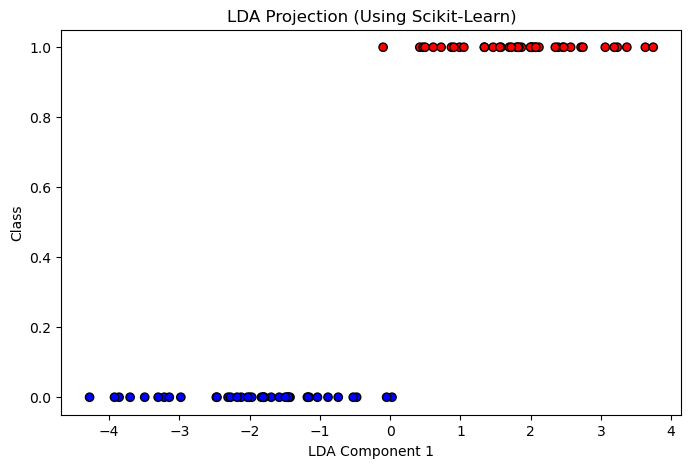

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train_lda, y_train, c=y_train, cmap='bwr', edgecolors='k')
plt.xlabel('LDA Component 1')
plt.ylabel('Class')
plt.title('LDA Projection (Using Scikit-Learn)')
plt.show()

# LDA Implementation Scikit-Learn Matrix Operations

In [8]:
# Separate data points by class
class_0 = X_train[y_train == 0]  # Class 0
class_1 = X_train[y_train == 1]  # Class 1

# Compute mean of each class
mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)


In [9]:
# Initialize Sw as a zero matrix
S_w = np.zeros((X_train.shape[1], X_train.shape[1]))

# Compute Sw for Class 0
for xi in class_0:
    diff = (xi - mean_0).reshape(-1, 1)
    S_w += diff @ diff.T

# Compute Sw for Class 1
for xi in class_1:
    diff = (xi - mean_1).reshape(-1, 1)
    S_w += diff @ diff.T


In [10]:
# Compute between-class scatter matrix Sb
mean_diff = (mean_1 - mean_0).reshape(-1, 1)
S_b = mean_diff @ mean_diff.T


In [11]:
# Solve the eigenvalue problem for Sw⁻¹ Sb
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w) @ S_b)

# Select the eigenvector corresponding to the largest eigenvalue
best_eigvec = eigvecs[:, np.argmax(eigvals)]


In [12]:
# Project training data onto the LDA component
X_train_lda_manual = X_train @ best_eigvec


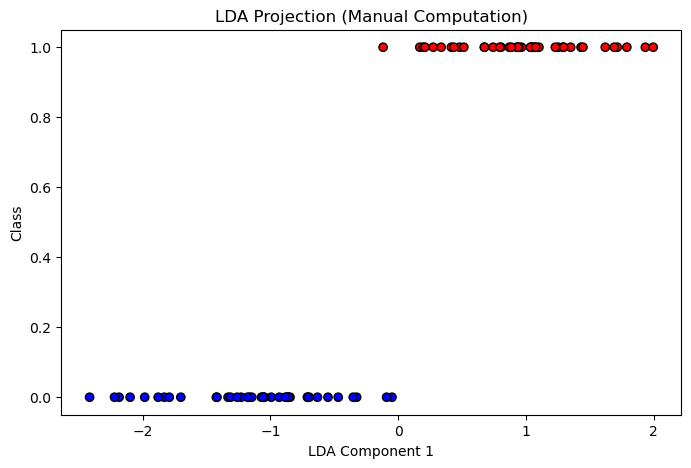

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train_lda_manual, y_train, c=y_train, cmap='bwr', edgecolors='k')
plt.xlabel('LDA Component 1')
plt.ylabel('Class')
plt.title('LDA Projection (Manual Computation)')
plt.show()